Yeast Protein Interaction

In [1]:
# importing libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading Yeast network
net=nx.read_pajek('Yeast.paj')

In [3]:
# generating graph
G = nx.Graph(net)

### Overview of graph

In [4]:
nodes = net.nodes()
edges = net.edges()
adj_mat = nx.to_numpy_array(net)
degree = adj_mat.sum(axis=0)

In [5]:
print(f"Total number of yeast/protien and interactions in the network are {len(nodes)} and {len(edges)} respectively.")

Total number of yeast/protien and interactions in the network are 2367 and 7186 respectively.


In [6]:
def draw_graph(graph,label=True):
    #plt.figure(figsize=(10,7))
    node_size_map=[i[1]*20 for i in graph.degree()]
    node_color_map = []
    for i in graph.degree():
        c = i[1]
        p = np.percentile([j[1] for j in graph.degree()],[50,80,95])
        if  c < p[0]:
            node_color_map.append('0.8')
        elif c < p[1]:
            node_color_map.append('0.65')
        elif c < p[2]:
            node_color_map.append('0.3')
        else:
            node_color_map.append('0')
    edge_color_map = []
    eb = nx.edge_betweenness(graph)
    for i in eb:
        c = eb[i]
        p = np.percentile(list(eb.values()),[50,80,95])
        if  c < p[0]:
            edge_color_map.append('0.8')
        elif c < p[1]:
            edge_color_map.append('0.65')
        elif c < p[2]:
            edge_color_map.append('0.3')
        else:
            edge_color_map.append('0')

    nx.draw_networkx(graph,alpha=0.7,node_color =node_color_map,with_labels=label,node_size=node_size_map,edge_color=edge_color_map)

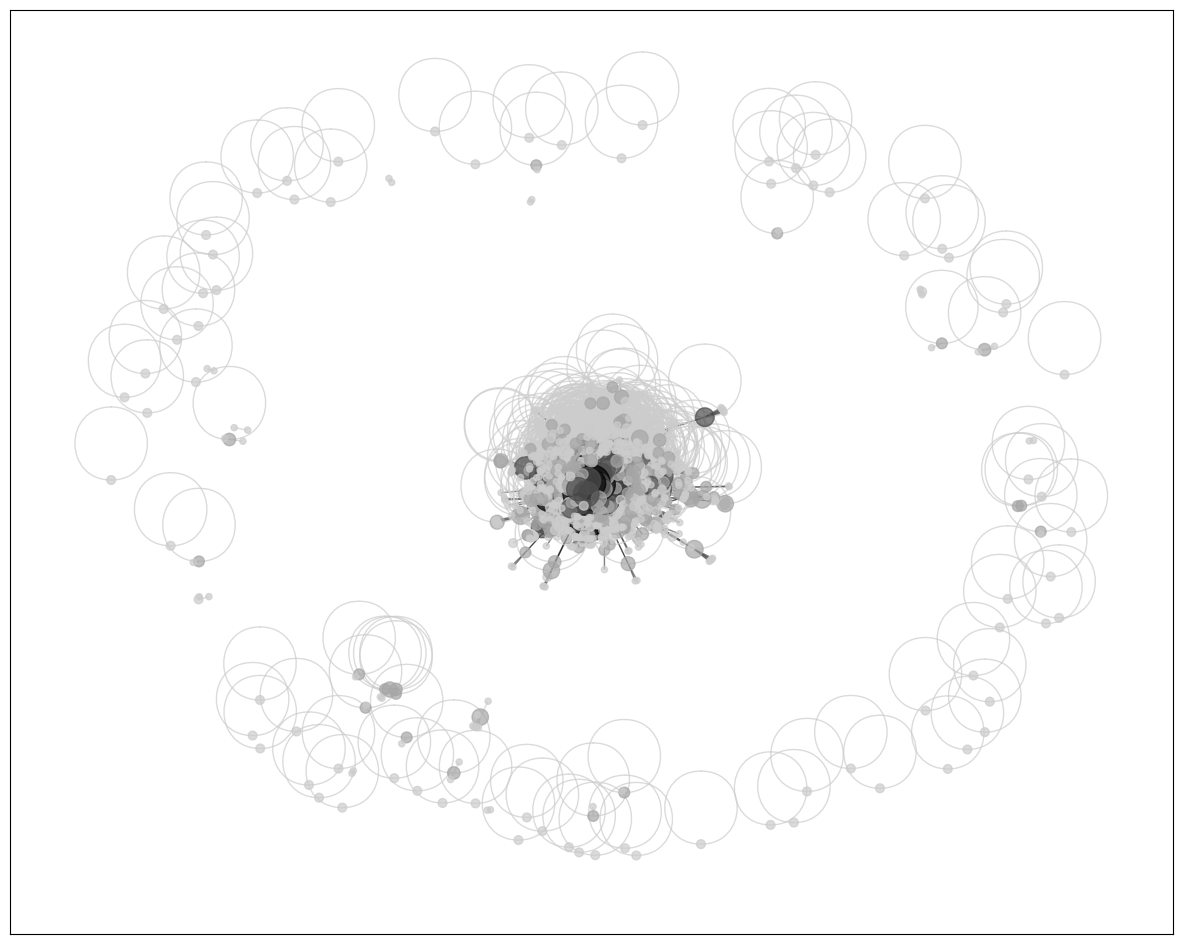

In [7]:
plt.figure(figsize=(15,12))
draw_graph(G,False)

from the above fig it can be concluded that their are protein particles interacting with themselves

In [8]:
t = 0
for i in range(len(adj_mat)):
    t+=adj_mat[i][i]
print(f"There are {t} self loops out of total {len(adj_mat)} nodes, which is {round(t*100/len(adj_mat),2)}%")

There are 536.0 self loops out of total 2367 nodes, which is 22.64%


#### Most interactive protiens/yeast
Which yeast is highly interactive?

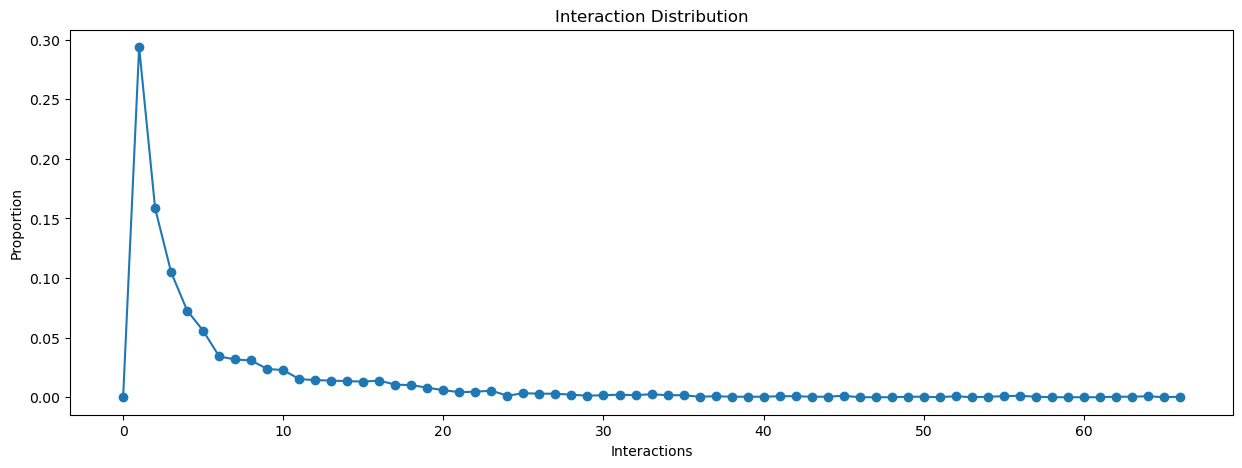

In [9]:
# Degree 
hist = nx.degree_histogram(net)
degree_distribution = np.array(hist)/sum(hist)
plt.figure(figsize=(15,5))
plt.plot(range(len(hist)), degree_distribution,marker='o')
plt.title("Interaction Distribution")
plt.xlabel("Interactions")
plt.ylabel("Proportion")
plt.show()

In [10]:
def degree_centrality(G):
    adj_mat = nx.to_numpy_array(G)
    deg = adj_mat.sum(axis=0)
    deg_cen = deg/(len(deg)-1)
    nodes = G.nodes()
    dic = {}
    for i,j in zip(nodes,deg_cen):
        dic[i]=j
    return dic

In [11]:
high_degree = degree_centrality(G)
highest_interactive_yeast = max(high_degree, key= high_degree.get)
print(f"Yeast with highest interactions is {highest_interactive_yeast}.")
high_degree_yeasts = list(dict(sorted(high_degree.items(), key = lambda x:x[1], reverse=True)).keys())
print("Top 10 highest interactive yeast/protein are \n",high_degree_yeasts[:10])

Yeast with highest interactions is YPR110C.
Top 10 highest interactive yeast/protein are 
 ['YPR110C', 'YIL035C', 'YGL137W', 'YMR106C', 'YPL204W', 'YNL189W', 'YDL213C', 'YLR074C', 'YBR055C', 'YCR057C']


#### Efficient Yeast
Which Yeast is highly effiecient?

In [12]:
efficient = nx.betweenness_centrality(G)
efficient_yeast = list(dict(sorted(efficient.items(), key = lambda x:x[1], reverse = True)).keys())
highest_efficient_yeast = efficient_yeast[0]
print(f'{highest_efficient_yeast} is highest efficient in interacting')
print("Top 10 efficient Yeasts are:\n",efficient_yeast[:10])

YNL189W is highest efficient in interacting
Top 10 efficient Yeasts are:
 ['YNL189W', 'YMR106C', 'YPL204W', 'YPR110C', 'YGL137W', 'YBR009C', 'YIL035C', 'YBR055C', 'YMR059W', 'YLR074C']


In [13]:
# Yeast efficient in interacting with maximum protiens
efficient_flow = nx.closeness_centrality(G)
efficient_yeast_flow = list(dict(sorted(efficient_flow.items(), key = lambda x:x[1], reverse = True)).keys())
closest_yeast = efficient_yeast_flow[0]
print(f'{closest_yeast} is highest efficient in maintaining flow')
print("Top 10 Yeasts efficient in maintaining the flow are:\n",efficient_yeast_flow[:10])

YBR009C is highest efficient in maintaining flow
Top 10 Yeasts efficient in maintaining the flow are:
 ['YBR009C', 'YPL204W', 'YOL139C', 'YIL035C', 'YMR106C', 'YPR110C', 'YDL213C', 'YGL137W', 'YMR012W', 'YMR049C']


In [14]:

print(f"Highest degree yeast ranks {efficient_yeast.index(highest_interactive_yeast)} and {efficient_yeast_flow.index(highest_interactive_yeast)} in efficiency and closeness resp.")

Highest degree yeast ranks 3 and 5 in efficiency and closeness resp.


In [15]:

print(f"Highest efficient yeast ranks {high_degree_yeasts.index(highest_efficient_yeast)} and {efficient_yeast_flow.index(highest_efficient_yeast)} in high degree and closeness resp.")

Highest efficient yeast ranks 5 and 15 in high degree and closeness resp.


In [16]:

print(f"Closest yeast ranks {high_degree_yeasts.index(closest_yeast)} and {efficient_yeast.index(closest_yeast)} in high degree and efficiency resp.")

Closest yeast ranks 12 and 5 in high degree and efficiency resp.


Partioning graph till highest connected component left 100(approx) nodes

In [17]:
eb = nx.edge_betweenness(G)

In [ ]:
%%time
# removing the smaller connected components to analyse lcc
# removing node with smallest betweenness centrality till we left with lcc
rn = min(nx.betweenness_centrality(G), key =nx.betweenness_centrality(G).get)
while nx.number_connected_components(G)!=1:
    G.remove_node(rn)
    rn = min(nx.betweenness_centrality(G), key =nx.betweenness_centrality(G).get)
draw_graph(G,False)

In [ ]:
%%time
eb = nx.edge_betweenness(G)
high_eb_edge = max(eb,key=eb.get)
cc = nx.number_connected_components(G)
t = True
while t:
    G.remove_edge(high_eb_edge[0],high_eb_edge[1])
    eb = nx.edge_betweenness(G)
    high_eb_edge = max(eb,key=eb.get)
    if nx.number_connected_components(G) == (cc+1):
        draw_graph(G,False)
        cc+=1
        break
        if len(max(nx.connected_components(G), key=len)) < 110:
            t = False

In [ ]:
valuable_nodes = list(dict(sorted(nx.betweenness_centrality(G).items(), key = lambda x:x[1])).keys())
for i in valuable_nodes[:-500]:
    G.remove_node(i)
draw_graph(G,False)

In [ ]:
%%time
eb = nx.edge_betweenness(G)
high_eb_edge = max(eb,key=eb.get)
cc = nx.number_connected_components(G)
t = True
while t:
    G.remove_edge(high_eb_edge[0],high_eb_edge[1])
    eb = nx.edge_betweenness(G)
    high_eb_edge = max(eb,key=eb.get)
    if nx.number_connected_components(G) == (cc+1):
        draw_graph(G,False)
        cc+=1
        if len(max(nx.connected_components(G), key=len)) < 100:
            t = False

In [ ]:
plt.figure(figsize=(15,12))
draw_graph(G,False)

from the above fig it seems we are having 4 major clusters

In [ ]:
nx.degree_histogram(net)[-10:]

from the degree distribution, we are having 5 yeast with most interactions, so checking the top 5 clusters

In [ ]:
G1 = G.copy()

In [ ]:
comps = [i for i in nx.connected_components(G1)]
comps_len = [len(i) for i in comps]

In [ ]:
sorted(comps_len,reverse=True)[:5]

keeping top 3 clusters and removing rest

In [ ]:
t = True
while True:
    # len of smallest component
    smallest = min(comps_len)
    # index of smallest component
    index = comps_len.index(smallest)
    # smallest component
    smallest_comp = comps[index]
    # removing the smallest component
    comps.remove(smallest_comp)
    comps_len.remove(smallest)
    for i in smallest_comp:
        G1.remove_node(i)
    if len(comps)==3:
        break

In [ ]:
plt.figure(figsize=(12,10))
draw_graph(G1,False)

In [ ]:
G1.number_of_nodes()

In [ ]:
high_degree = degree_centrality(G1)
highest_interactive_yeast = max(high_degree, key= high_degree.get)
print(f"Yeast with highest interactions is {highest_interactive_yeast}.")
high_degree_yeasts = list(dict(sorted(high_degree.items(), key = lambda x:x[1], reverse=True)).keys())

In [ ]:
efficient = nx.betweenness_centrality(G1)
efficient_yeast = list(dict(sorted(efficient.items(), key = lambda x:x[1], reverse = True)).keys())
highest_efficient_yeast = efficient_yeast[0]
print(f'{highest_efficient_yeast} is highest efficient in interacting')

In [ ]:
efficient_flow = nx.closeness_centrality(G1)
efficient_yeast_flow = list(dict(sorted(efficient_flow.items(), key = lambda x:x[1], reverse = True)).keys())
closest_yeast = efficient_yeast_flow[0]
print(f'{closest_yeast} is highest efficient in maintaining flow')

In [ ]:
s_high_degree = degree_centrality(net)

In [ ]:
s_efficient = nx.betweenness_centrality(net)

In [ ]:
s_efficient_flow = nx.closeness_centrality(net)

In [ ]:
s_high_degree_yeasts = list(dict(sorted(s_high_degree.items(), key = lambda x:x[1], reverse=True)).keys())
s_efficient_yeast = list(dict(sorted(s_efficient.items(), key = lambda x:x[1], reverse = True)).keys())
s_efficient_yeast_flow = list(dict(sorted(s_efficient_flow.items(), key = lambda x:x[1], reverse = True)).keys())

In [ ]:
print(f"{closest_yeast} rank in starting {s_high_degree_yeasts.index(highest_interactive_yeast)+1}, {s_efficient_yeast.index(highest_interactive_yeast)+1} and {s_efficient_yeast_flow.index(highest_interactive_yeast)+1} in interaction,efficiency and closeness resp.")

In [ ]:
# now visualisig the largest component
comps = [i for i in nx.connected_components(G1)]
comps_len = [len(i) for i in comps]
t = True
while True:
    # len of smallest component
    smallest = min(comps_len)
    # index of smallest component
    index = comps_len.index(smallest)
    # smallest component
    smallest_comp = comps[index]
    # removing the smallest component
    comps.remove(smallest_comp)
    comps_len.remove(smallest)
    for i in smallest_comp:
        G1.remove_node(i)
    if len(comps)==1:
        break

In [ ]:
plt.figure(figsize=(12,8))
draw_graph(G1,False)

In [ ]:
print('Most interactive yeast',max(degree_centrality(G1), key= high_degree.get))
print('Most efficient yeast',max(nx.betweenness_centrality(G1), key= high_degree.get))
print('Most closest yeast',max(nx.closeness_centrality(G1), key= high_degree.get))

In [ ]:
G2 = nx.Graph(net)

In [ ]:
def google_pagerank(G,alpha):
    # Google Page Rank
    nodes = list(G.nodes()) # list of nodes
    net_in = nx.to_numpy_array(G).T # In degree adjacency matrix
    out_d = net_in.sum(axis=0) # number Out degree for nodes 
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if out_d[j] == 0: 
                net_in[i][j] = alpha/len(nodes) # when out degree is 0
            else:
                net_in[i][j] = alpha/len(nodes) + (1-alpha)*net_in[i][j]/out_d[j]
    initial_r = np.ones(len(nodes))/len(nodes) # Initial pagerank of nodes
    while True:
        rank = np.dot(net_in,initial_r) # using matrix R = TR
        delta = max(abs(rank - initial_r))
        initial_r = rank
        # Stopping the program when itconverges to difeerence of less than 1.0e-08
        if delta < 1.0e-08: 
            page_rank = {}
            for i in range(len(nodes)):
                page_rank[nodes[i]]=initial_r[i]
            return page_rank

In [ ]:
page_rank = {}
for alpha in [0.15,0.20,0.25]:
    gpr = google_pagerank(G2,alpha)
    page_rank['alpha:'+str(alpha)] = max(gpr, key=gpr.get)

In [ ]:
page_rank_c = {}
for alpha in [0.15,0.20,0.25]:
    gpr = google_pagerank(G1,alpha)
    page_rank_c['alpha:'+str(alpha)] = max(gpr, key=gpr.get)

In [ ]:
print(page_rank,'\n',page_rank_c)

In [ ]:
def init_rank(y):
    print(f"{y} rank in starting {s_high_degree_yeasts.index(y)+1}, {s_efficient_yeast.index(y)+1} and {s_efficient_yeast_flow.index(y)+1} in interaction,efficiency and closeness resp.")

In [ ]:
init_rank('YMR106C')
init_rank('YIL035C')

In [ ]:
def hits(G,it=100, delta = 1e-11):
    adj_mat = nx.to_numpy_array(G)
    nodes = G.nodes()
    l=len(adj_mat)
    hub = np.ones((l,1))
    hub = hub/np.linalg.norm(hub)
    auth= np.dot(adj_mat.T,hub)
    auth = auth/np.linalg.norm(auth)
    for i in range(it):
        n_hub = np.dot(adj_mat,auth)
        n_hub = n_hub/np.linalg.norm(n_hub)
        max_h = max(np.abs(hub-n_hub))
        hub = n_hub
        n_auth= np.dot(adj_mat.T,hub)
        n_auth = n_auth/np.linalg.norm(n_auth)
        max_a = max(np.abs(auth-n_auth))
        auth = n_auth
        diff = max(max_h,max_a)
        if diff < delta:
            break
    auth_dic = {}
    hub_dic = {}
    for node, h, a in zip(nodes, hub, auth):
        hub_dic[node] = h[0]
        auth_dic[node] = a[0]
    return hub_dic,auth_dic

In [ ]:
o_hub,o_auth = hits(G2)
oy_hub = max(o_hub,key=o_hub.get)
oy_auth = max(o_auth, key=o_auth.get)
print(oy_hub,oy_auth)

In [ ]:
f_hub,f_auth = hits(G2)
fy_hub = max(f_hub,key=f_hub.get)
fy_auth = max(f_auth, key=f_auth.get)
print(fy_hub,fy_auth)

In [ ]:
init_rank(oy_auth)

In [ ]:
'''
@inproceedings{nr,
     title={The Network Data Repository with Interactive Graph Analytics and Visualization},
     author={Ryan A. Rossi and Nesreen K. Ahmed},
     booktitle={AAAI},
     url={http://networkrepository.com},
     year={2015}
}'''